## Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
%matplotlib inline

## Loading the Dataset

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
adult=pd.read_csv(url,names=names,skipinitialspace=True)  #skipinitialspace helps to remove extra whitespaces at the starting or end of the data

## Analyzing the Data

In [3]:
print(adult.head(10))  #taking a look at first 10 heads

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Mar

In [4]:
print(adult.shape)  #to get the number of rows and columns of the data

(32561, 15)


In [5]:
print(adult.describe())  #a brief description of our data

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [6]:
print(adult.info()) #important information as it tells the datatype and nulltype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
print(pd.isnull(adult).sum()) #total number of null values per column.... it is showing 0 because the missing values/null values are marked as '?' in our data , we'll handle that in cleaning process

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [8]:
print(adult.groupby('salary').size())  #now let's see the ratio of the classes of our data

salary
<=50K    24720
>50K      7841
dtype: int64


In [9]:
print(adult.select_dtypes(include="object").columns) #we can also see the non-numeric data columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')


## Data Cleaning

In [10]:
adult.replace('?',np.nan,inplace=True) #now in order to make the missing values visible we will replace the '?'
adult.head(30)  #asked 30 heads to show because the missing value was at 27th index

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [11]:
print(round((adult.isnull().sum()/len(adult.index))*100)) #now we can see the percentage of missing values in each column

age               0.0
workclass         6.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        6.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    2.0
salary            0.0
dtype: float64


In [12]:
adult.dropna(inplace=True)
adult.drop(['fnlwgt','education-num','relationship'],axis=1,inplace=True) #these features are not as such required
print(adult.shape)

(30162, 12)


In [13]:
adult.head()

,age,workclass,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [14]:
adult.drop_duplicates(inplace=True,ignore_index=True) #in order to prevent biasness by model, we are going to remove duplicates
for colname in adult.columns:
    print(adult.groupby(colname)['salary'].size(),"\n\n")
    array=adult[colname].unique()
    array.sort()
    print("Unique Values:",len(array),"\n",array,"\n\n")

age
17    240
18    337
19    396
20    424
21    434
     ... 
84      8
85      3
86      1
88      3
90     33
Name: salary, Length: 72, dtype: int64 


Unique Values: 72 
 [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 90] 


workclass
Federal-gov           922
Local-gov            1993
Private             18422
Self-emp-inc         1049
Self-emp-not-inc     2425
State-gov            1241
Without-pay            14
Name: salary, dtype: int64 


Unique Values: 7 
 ['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay'] 


education
10th             759
11th             925
12th             354
1st-4th          149
5th-6th          281
7th-8th          540
9th              448
Assoc-acdm       986
Assoc-voc       1241
Bachelors       4382
Doctorate        364
HS-grad         7

## Data Visualization

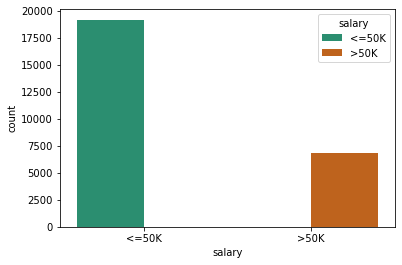

In [15]:
import seaborn as sns
sns.countplot(x='salary',data=adult,hue='salary',palette='Dark2')
plt.show()

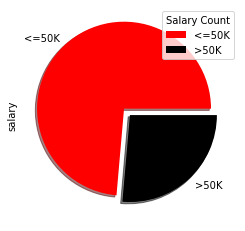

In [27]:
colors=['red','black']
adult['salary'].value_counts().plot.pie(colors=colors,explode=[0.1,0],shadow=True)
plt.legend(title='Salary Count')
plt.show()

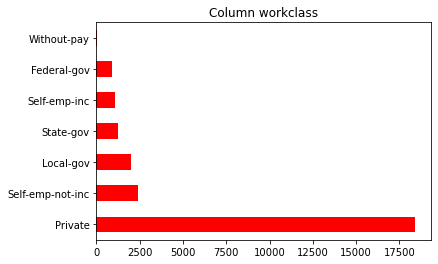

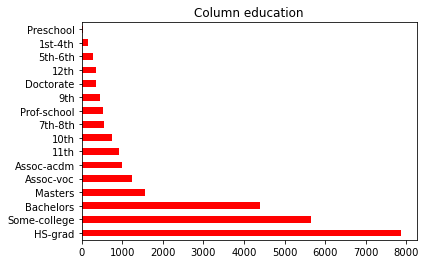

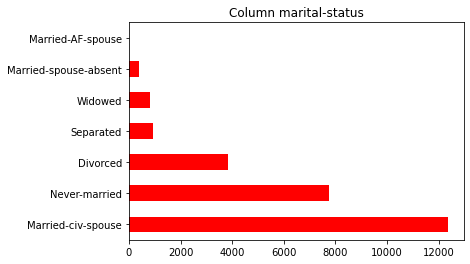

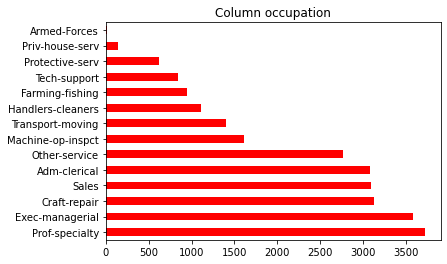

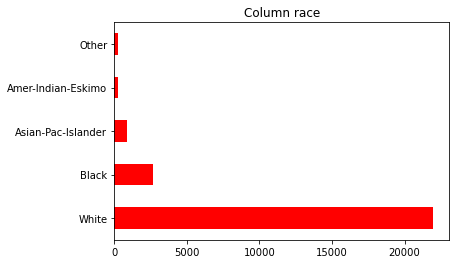

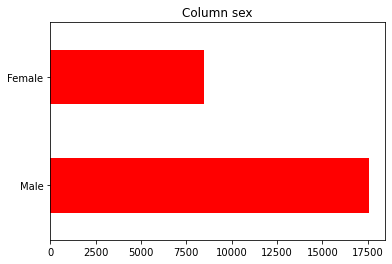

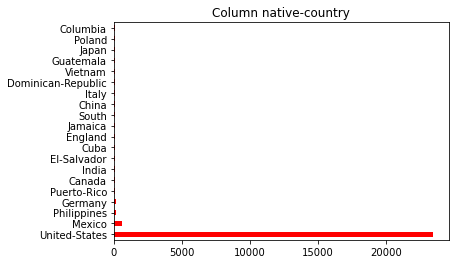

In [16]:
categorical_col=adult.select_dtypes(include="object").columns.drop('salary') #to show value counts per category
for colname in categorical_col:
    plt.title("Column "+colname)
    (adult[colname].value_counts().head(20).plot(kind='barh',color='r')) #we are taking only 20 heads as otherwise it will mess up due to uneven frequency 
    plt.show()

What we observed?

1. Large number of race = white values
2. Also there are more Males than females
3. Most of them are from private sector and educated with HS graduation
4. Very large number of native-country = United-States values, which infact can be ignored if taking it down as binary values. For ex United-States values can be said as True and rest as False

## Coming to Numerical Columns

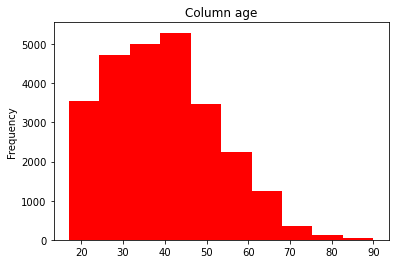

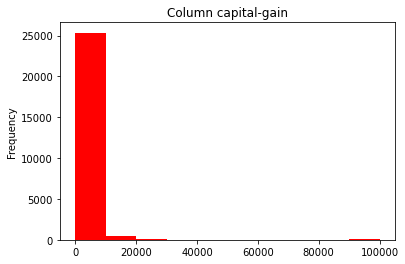

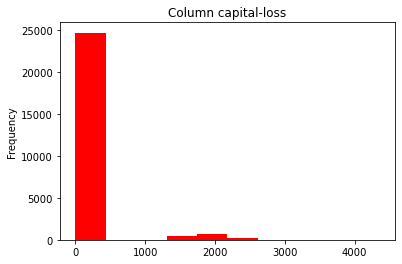

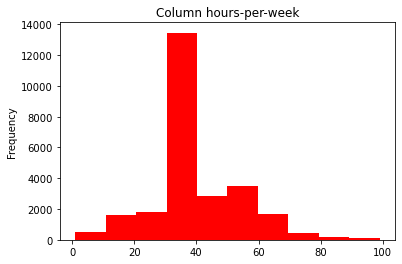

In [17]:

for colname in adult._get_numeric_data():
    plt.title("Column "+colname)
    adult[colname].plot(kind='hist',color='r')
    plt.show()

What we observed?

1. We can see the hours_per_week column reaches highest value at 40 and most of people have age greater than 50 years
2. Also the spike in capital-loss and capital-gain column is at 0 that means most of the people don't make any capital-loss or capital-gain

## Finding Correlation between Numeric data

### Heatmap

<AxesSubplot:>

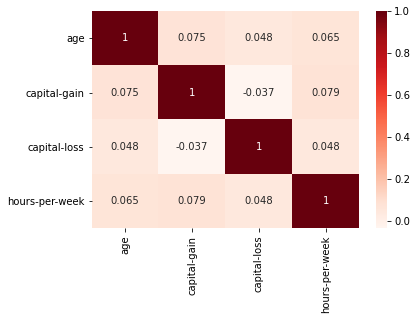

In [18]:
corr=adult._get_numeric_data().corr()
sns.heatmap(corr,cmap='Reds',annot=True)

What we observed?

We can see that there is not much correlation as the hot-colors are quite less in our heatmap

### Pairplot

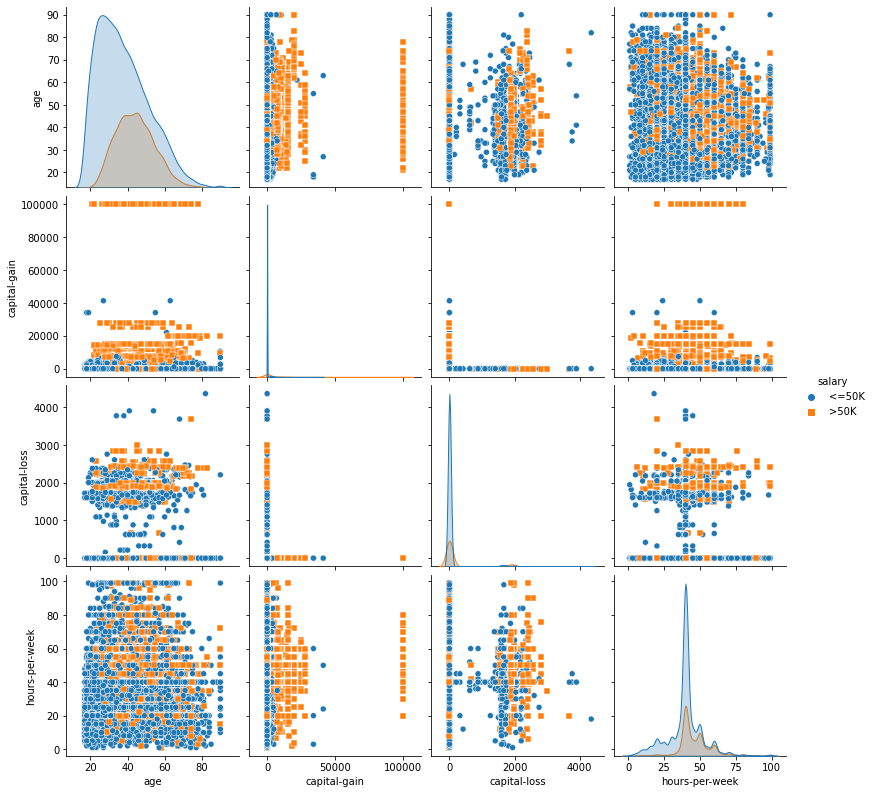

In [19]:
sns.pairplot(adult,hue='salary',height=2.8,markers=['o','s'])
plt.show()

What we observed?

Here at the second plot of the first row we can see that as the capital-gain increases chances of person having salary greater than 50K increases irrespective of the age.
Similarily looking at the first plot of last row we can conclude that person with less age and less hours-per-week of worktime tend to have salary less than or equal to 50K.

As we said in the heatmap too, there is no such correlation occuring between these numeric categories so we can't really analyse that properly.

## Visualizing categories with class

### Numerical Data

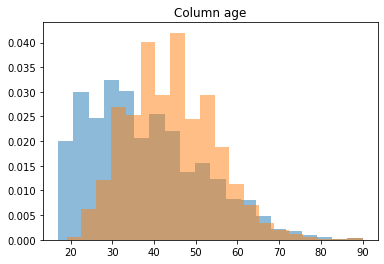

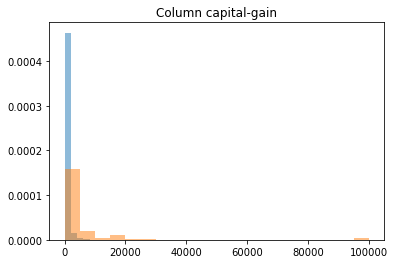

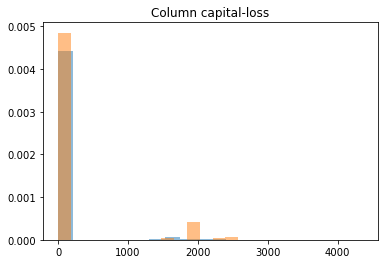

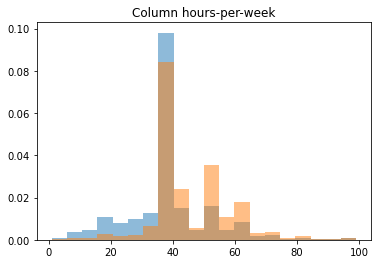

In [20]:
for colname in adult._get_numeric_data():
    plt.title("Column "+colname)
    low_income=adult.loc[adult['salary']=='<=50K',colname]
    high_income=adult.loc[adult['salary']=='>50K',colname]
    plt.hist(low_income,label='<=50K',bins=20,density=True,alpha=0.5)
    plt.hist(high_income,label='>50K',bins=20,density=True,alpha=0.5)
    plt.show()

What we observed?

1. Person with more age has more chances of higher income.
2. Person with no capital-gain is more likely to have low income whereas person with no capital-loss is more likely to have high income
3. Also the person working more than 40 hours-per-week has more probability of having higher income

### Categorical Data

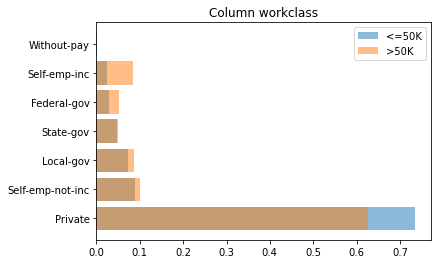

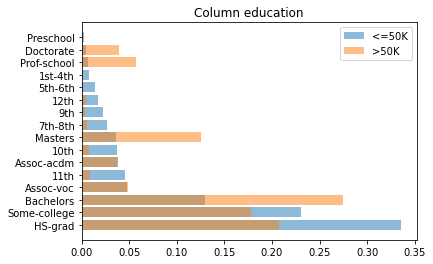

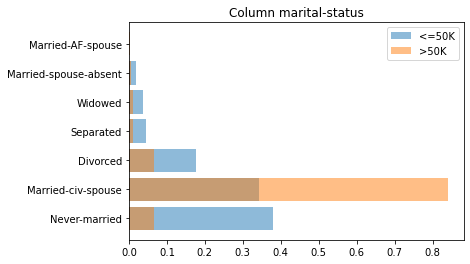

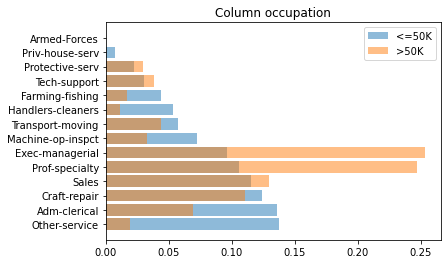

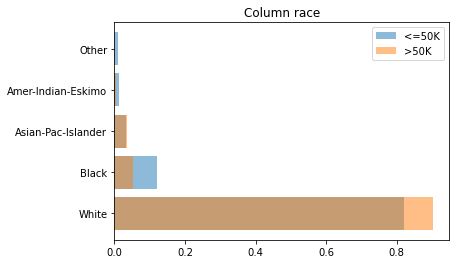

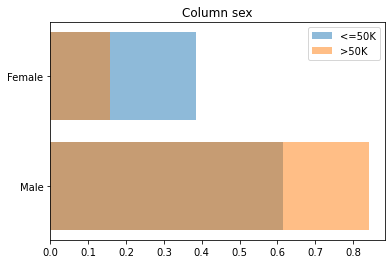

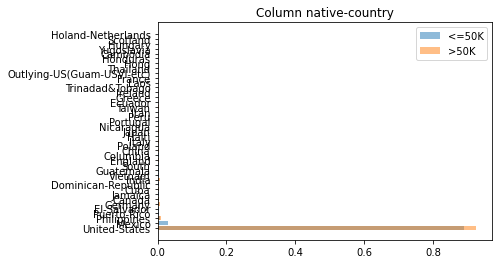

In [21]:
categorical_col=adult.select_dtypes(include="object").columns.drop('salary')
for colname in categorical_col:
    plt.title("Column "+colname)
    low_income=adult.loc[adult['salary']=='<=50K',colname].value_counts()
    high_income=adult.loc[adult['salary']=='>50K',colname].value_counts()
    low_bar=plt.barh(low_income.index,low_income.values/low_income.values.sum(),label='<=50K',alpha=0.5)
    high_bar=plt.barh(high_income.index,high_income.values/high_income.values.sum(),label='>50K',alpha=0.5)
    plt.legend([low_bar, high_bar], ['<=50K', '>50K'])
    plt.show()

What we observed?

1. Here at workclass plot we see that person working in private sector is more likely to have income less than 50K
2. Person with graduation in Doctorate,Masters,Bachelors or School professor is more likely to have higher income rather than person from HS grad or some college graduate.
3. While looking at marital-status plot we can conclude that person married and having civilian spouse has more income whereas a divorced or never married person has less income.
4. Also we can say that people of white race have higher chances of having salary greater than 50K and most of them we can say are male looking at our next plot that is of sex